In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import warnings
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy import stats

warnings.filterwarnings('ignore')
###sns.set(style="whitegrid")
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeDf = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()
lifeDf.columns = lifeDf.columns.str.strip().str.lower().str.replace(' ', '_')

In [2]:
lifeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under-five_deaths                  2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria                         2919 non-null float64
hiv/aids                           2938 non-null

In [3]:
lifeDf.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
lifeDf.isnull()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 1) Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.¶

In [5]:
for column_name in lifeDf.columns:
    print("Unique values in column {} are: {}".format(column_name, lifeDf[column_name].unique()))

Unique values in column country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [6]:
lifeDf.nunique()

country                             193
year                                 16
status                                2
life_expectancy                     362
adult_mortality                     425
infant_deaths                       209
alcohol                            1076
percentage_expenditure             2328
hepatitis_b                          87
measles                             958
bmi                                 608
under-five_deaths                   252
polio                                73
total_expenditure                   818
diphtheria                           81
hiv/aids                            200
gdp                                2490
population                         2278
thinness__1-19_years                200
thinness_5-9_years                  207
income_composition_of_resources     625
schooling                           173
dtype: int64

In [7]:
lifeDf.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [8]:
fill_list =["life_expectancy", "adult_mortality", "infant_deaths", "alcohol",
             "percentage_expenditure", "hepatitis_b", "measles", "bmi", "polio", 
             "total_expenditure", "diphtheria",  "hiv/aids", "gdp", "population",  
             "thinness__1-19_years", "income_composition_of_resources", "schooling"]
lifeDf.loc[:, fill_list] = lifeDf.loc[:, fill_list].fillna(lifeDf.loc[:, fill_list].mean())


In [9]:
lifeDf.drop(['thinness_5-9_years', 'status'], axis=1, inplace=True)
lifeDf.columns



Index(['country', 'year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [10]:
lifeDf.isnull().sum()/lifeDf.isnull().count()

country                            0.0
year                               0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness__1-19_years               0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

Filling columns to make sure they are reduced to decimals for easier handeling.

In [11]:
countryList = lifeDf.country

for i in range(0, len(lifeDf.country)):
    if pd.isnull(lifeDf.country[i]):
        lifeDf.country[i] = lifeDf.country[i-1]
        
lifeDf["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', "Côte d'Ivoire", 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Slovakia', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia

In [12]:
lifeDf.isnull().sum()

country                            0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
income_composition_of_resources    0
schooling                          0
dtype: int64

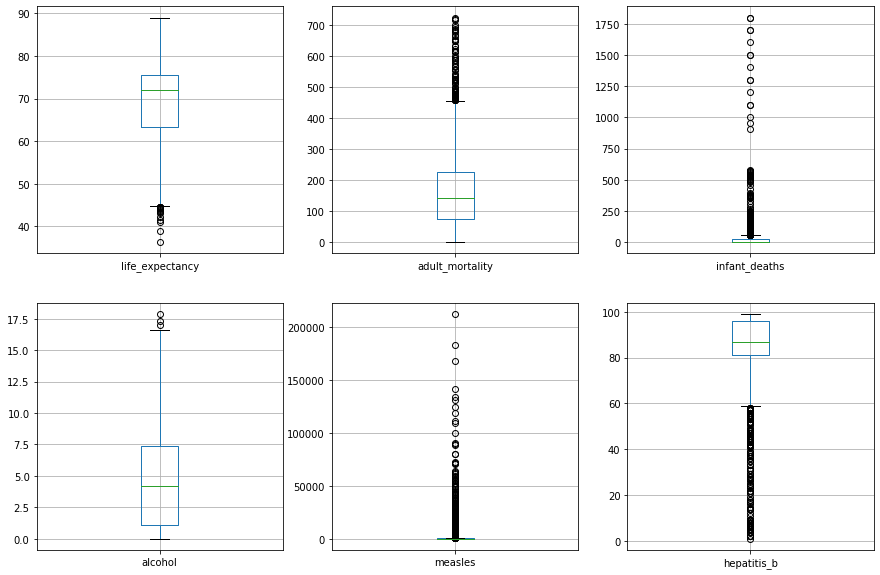

In [13]:
plt.figure(figsize=(15,10))
for i, col in enumerate(["life_expectancy","adult_mortality", "infant_deaths",
                         "alcohol", "measles", "hepatitis_b"], start=1):
    plt.subplot(2, 3, i)
    lifeDf.boxplot(col)

the subplots above shows there are many outliers that needs to be elimited.
All columns expect alcohol don't have many outliers.

In [14]:
from scipy.stats.mstats import winsorize
winsorizeLife = winsorize(lifeDf["life_expectancy"],(0, 0.10))
winsorizeAmortality = winsorize(lifeDf["adult_mortality"],(0, 0.10))
winsorizeIdeaths = winsorize(lifeDf["infant_deaths"],(0, 0.10))
winsorizeAlcohol = winsorize(lifeDf["alcohol"],(0, 0.10))
winsorizeMeasles = winsorize(lifeDf["measles"],(0, 0.10))
winsorizeHepB = winsorize(lifeDf["hepatitis_b"],(0, 0.10))

winsorizeLife,winsorizeAmortality, winsorizeIdeaths,winsorizeAlcohol,winsorizeMeasles,winsorizeHepB

(masked_array(data=[65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[263., 271., 268., ...,  73., 336., 336.],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[58, 58, 58, ..., 25, 25, 24],
              mask=False,
        fill_value=999999),
 masked_array(data=[0.01, 0.01, 0.01, ..., 4.43, 1.72, 1.68],
              mask=False,
        fill_value=1e+20),
 masked_array(data=[1154,  492,  430, ...,  304,  529, 1483],
              mask=False,
        fill_value=999999),
 masked_array(data=[65., 62., 64., ..., 73., 76., 79.],
              mask=False,
        fill_value=1e+20))

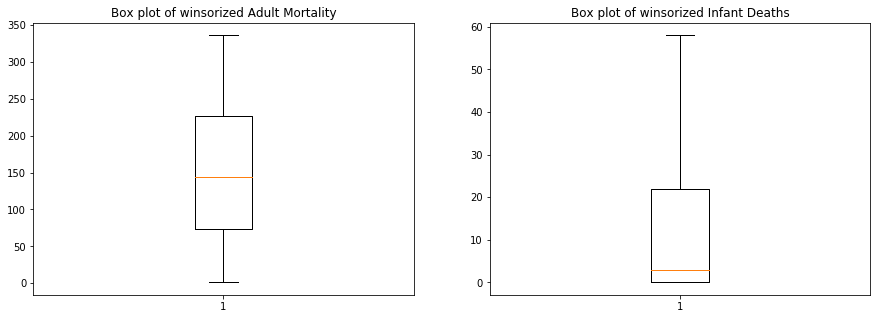

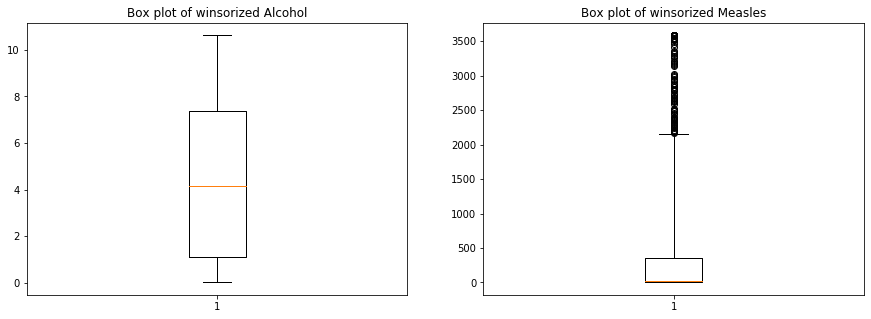

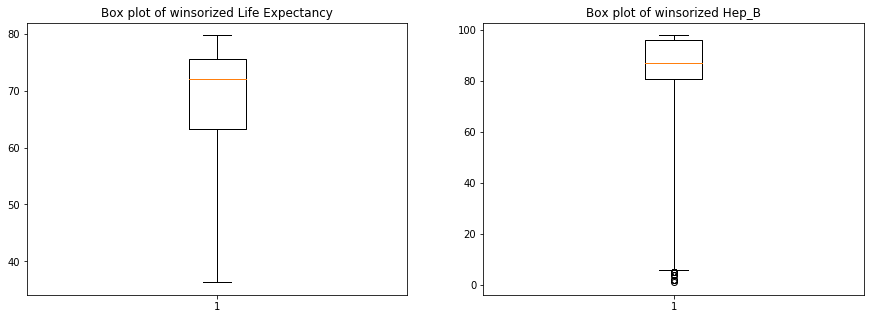

In [15]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorizeAmortality, whis = 5)
plt.title("Box plot of winsorized Adult Mortality")

plt.subplot(1,2,2)
plt.boxplot(winsorizeIdeaths, whis = 5)
plt.title("Box plot of winsorized Infant Deaths")
plt.show()


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorizeAlcohol, whis = 5)
plt.title("Box plot of winsorized Alcohol")

plt.subplot(1,2,2)
plt.boxplot(winsorizeMeasles, whis = 5)
plt.title("Box plot of winsorized Measles")
plt.show()


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorizeLife, whis = 5)
plt.title("Box plot of winsorized Life Expectancy")

plt.subplot(1,2,2)
plt.boxplot(winsorizeHepB, whis = 5)
plt.title("Box plot of winsorized Hep_B")
plt.show()


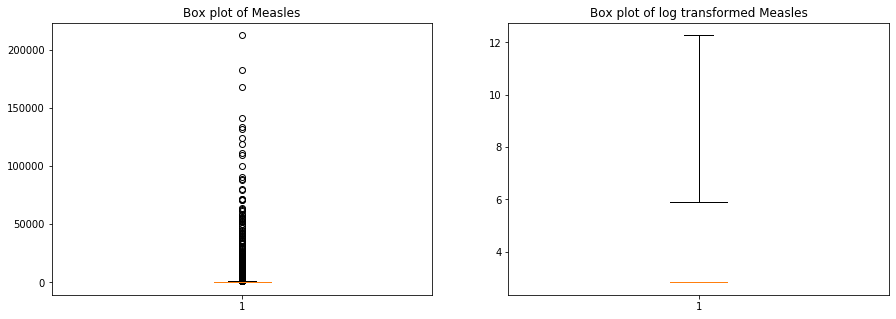

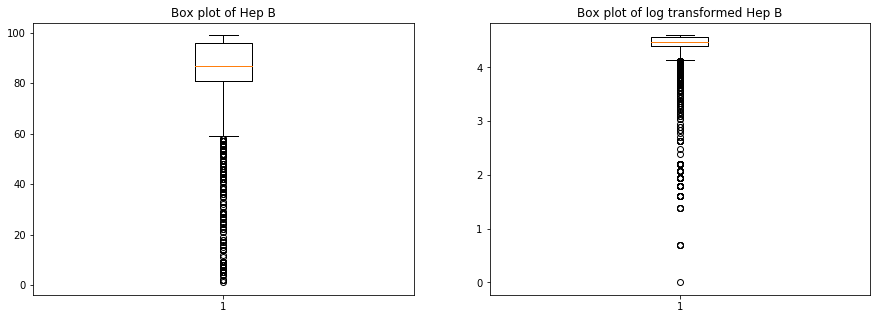

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(lifeDf["measles"])
plt.title("Box plot of Measles")

plt.subplot(1,2,2)
plt.boxplot(np.log(lifeDf["measles"]))
plt.title("Box plot of log transformed Measles")
plt.show()

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.boxplot(lifeDf["hepatitis_b"])
plt.title("Box plot of Hep B")

plt.subplot(1,2,2)
plt.boxplot(np.log(lifeDf["hepatitis_b"]))
plt.title("Box plot of log transformed Hep B")
plt.show()


In [17]:
# now we take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(lifeDf["measles"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(lifeDf["measles"]) > max_val) 
                      | (np.log(lifeDf["measles"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


Outliers for measles have been elimated totally.

In [18]:
# now we take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(lifeDf["hepatitis_b"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(lifeDf["hepatitis_b"]) > max_val) 
                      | (np.log(lifeDf["hepatitis_b"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 453
The score threshold is: 1.5
Number of outliers is: 347
The score threshold is: 2.0
Number of outliers is: 312
The score threshold is: 2.5
Number of outliers is: 285
The score threshold is: 3.0
Number of outliers is: 268
The score threshold is: 3.5
Number of outliers is: 243
The score threshold is: 4.0
Number of outliers is: 218
The score threshold is: 4.5
Number of outliers is: 211


Hep B does retain 211 outliers, however we will continue with description because all other outliers for the variables have been elimated.

# 2) Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy

In [19]:
lifeDf.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,0.948000,20.700000


the mean for life expectancy is 69 years of age

the min is 36 years of age 

the meian is 72 years of age 

In [20]:
lifeDf.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,income_composition_of_resources,schooling
year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,0.236333,0.203471
life_expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,0.692483,0.715066
adult_mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,-0.440062,-0.435108
infant_deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,-0.143663,-0.191757
alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,0.416099,0.497546
percentage_expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,0.380374,0.388105
hepatitis_b,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,0.150992,0.171755
measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,-0.115764,-0.122609
bmi,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,0.479837,0.508105
under-five_deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,-0.161533,-0.207111


In [21]:
lifeDf.groupby("life_expectancy").mean()[["adult_mortality", "infant_deaths", "alcohol", "measles", "hepatitis_b"]]

,adult_mortality,infant_deaths,alcohol,measles,hepatitis_b
life_expectancy,,,,,
36.3,682.000000,23.000000,5.760000,0.000000,80.940461
39.0,533.000000,29.000000,3.970000,3575.000000,80.940461
41.0,519.000000,30.000000,4.210000,649.000000,80.940461
41.5,57.000000,30.000000,4.070000,586.000000,80.940461
42.3,496.000000,30.000000,3.990000,7.000000,80.940461
43.1,588.000000,51.000000,1.180000,304.000000,80.940461
43.3,48.000000,30.000000,3.830000,29.000000,80.940461
43.5,599.000000,48.000000,1.150000,150.000000,80.940461
43.8,614.000000,44.000000,2.620000,30930.000000,80.940461


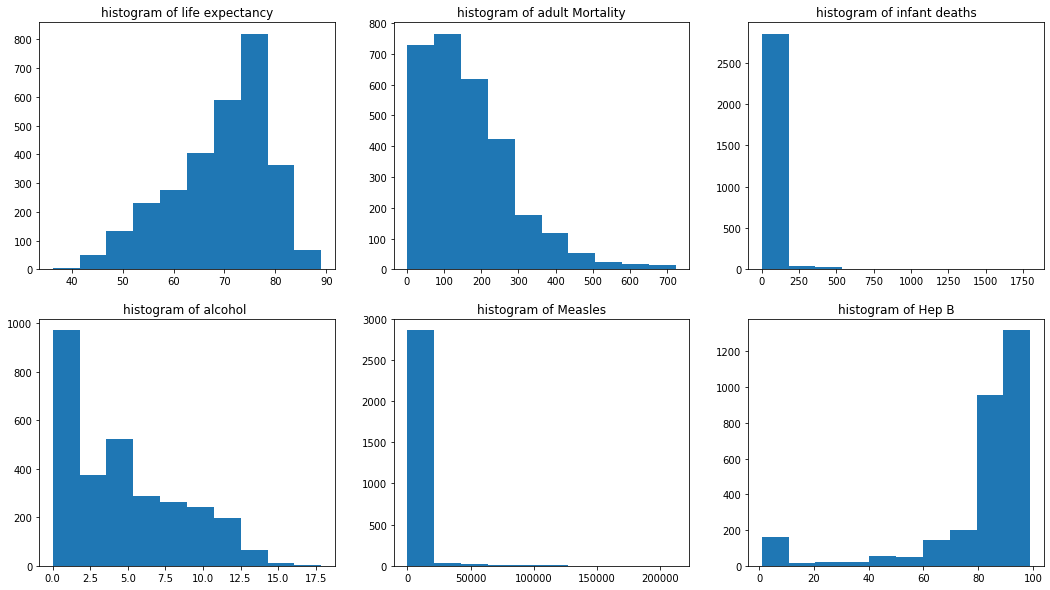

In [22]:
plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(lifeDf["life_expectancy"])
plt.title("histogram of life expectancy")

plt.subplot(2, 3, 2)
plt.hist(lifeDf["adult_mortality"])
plt.title("histogram of adult Mortality")

plt.subplot(2, 3, 3)
plt.hist(lifeDf["infant_deaths"])
plt.title("histogram of infant deaths")


plt.subplot(2, 3, 4)
plt.hist(lifeDf["alcohol"])
plt.title("histogram of alcohol ")

plt.subplot(2, 3, 5)
plt.hist(lifeDf["measles"])
plt.title("histogram of Measles")

plt.subplot(2, 3, 6)
plt.hist(lifeDf["hepatitis_b"])
plt.title("histogram of Hep B")

plt.show()




Life expectancy is skeweed to the right a bit, however is a bit normalized

Adult mortality is left skeweed 

Infant deaths is extremely left skeweed 

histrogram of alcohol is a bit normalized 

histogram of measles is extremely left skeweed 

histogram of Hep B is right skeweed

In [23]:
lifeDf[["life_expectancy", "adult_mortality", "infant_deaths",
              "alcohol", "measles", "hepatitis_b"]].corr()

,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,hepatitis_b
life_expectancy,1.000000,-0.696359,-0.196535,0.391598,-0.157574,0.203771
adult_mortality,-0.696359,1.000000,0.078747,-0.190408,0.031174,-0.138591
infant_deaths,-0.196535,0.078747,1.000000,-0.113812,0.501128,-0.178783
alcohol,0.391598,-0.190408,-0.113812,1.000000,-0.051055,0.075447
measles,-0.157574,0.031174,0.501128,-0.051055,1.000000,-0.090317
hepatitis_b,0.203771,-0.138591,-0.178783,0.075447,-0.090317,1.000000


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = lifeDf[["life_expectancy", "adult_mortality",
                  "infant_deaths", "alcohol", "hepatitis_b","measles"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
lifeDf["pca"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


## data set with many columns 
## 

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.35257757]


In [25]:
 lifeDf[["pca","life_expectancy", "adult_mortality",
                  "infant_deaths", "alcohol", "hepatitis_b","measles"]].corr()

,pca,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles
pca,1.000000,-0.854081,0.719201,0.509090,-0.520845,-0.396648,0.425416
life_expectancy,-0.854081,1.000000,-0.696359,-0.196535,0.391598,0.203771,-0.157574
adult_mortality,0.719201,-0.696359,1.000000,0.078747,-0.190408,-0.138591,0.031174
infant_deaths,0.509090,-0.196535,0.078747,1.000000,-0.113812,-0.178783,0.501128
alcohol,-0.520845,0.391598,-0.190408,-0.113812,1.000000,0.075447,-0.051055
hepatitis_b,-0.396648,0.203771,-0.138591,-0.178783,0.075447,1.000000,-0.090317
measles,0.425416,-0.157574,0.031174,0.501128,-0.051055,-0.090317,1.000000


Pca is in very good corrolation with other columns. Except with life expectancy, and adult mortality are 0.85 and 0.71. I would choose the pca to feed to my modeling. Life expectancy in corrolations with infant death and measles is low on the scale, however it will satisified the corrolation.